In [1]:
%load_ext autoreload

In [181]:
%autoreload 2
%aimport sog1_helpers

import pandas as pd
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

#plt.rcParams['text.usetex'] = True

plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Helvetica" #somethings this one doesnt work
plt.rcParams['pdf.fonttype'] = 42

# Plan

Phosophorylation
- Does phosphorylation affect activity?
- What is the order of importance of phosphosites?
- Are there any potential phosphosites that contribute to activity?
- Do different phosphosite sequences affect activity?


In [183]:
activity_col = "Activity_S3_1"

In [223]:
sog1_aa_features = pd.read_csv("../data/Sog1_AA_features.csv")
sog1_aa_features["PS"] = sog1_aa_features["PS_lib2"] == "confirmed"
sog1_aa_features = sog1_aa_features[["pos", "PS"]]
sog1_aa_features

,pos,PS
0,1,False
1,2,False
2,3,False
3,4,False
4,5,False
...,...,...
444,445,False
445,446,False
446,447,False
447,448,False


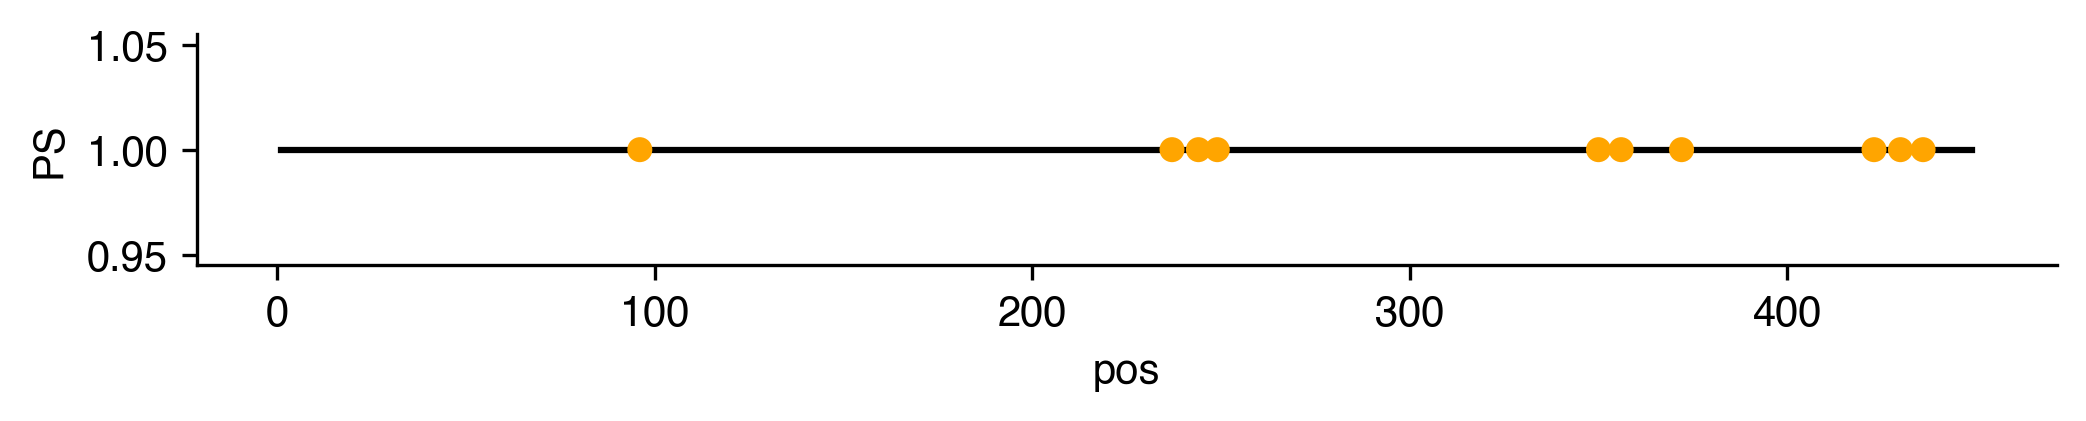

In [242]:
plt.figure(figsize = (8, 1), dpi = 300)
sns.lineplot(data = sog1_aa_features, x = "pos", y = 1, color = "black")
sns.scatterplot(data = sog1_aa_features[sog1_aa_features["PS"]], x = "pos", y = "PS", color = "orange", zorder = 10, edgecolor = "none")
sns.despine()

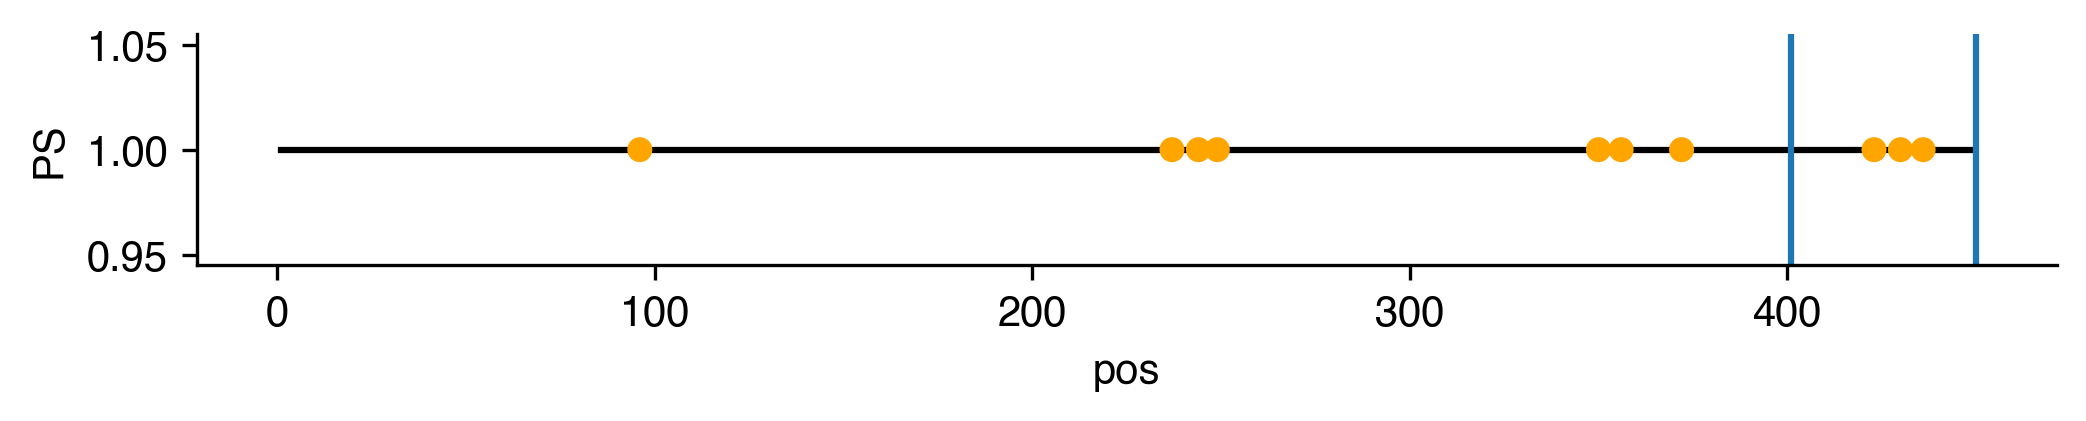

In [246]:
plt.figure(figsize = (8, 1), dpi = 300)
sns.lineplot(data = sog1_aa_features, x = "pos", y = 1, color = "black")
sns.scatterplot(data = sog1_aa_features[sog1_aa_features["PS"]], x = "pos", y = "PS", color = "orange", zorder = 10, edgecolor = "none")
plt.axvline(401)
plt.axvline(450)
sns.despine()

In [252]:
sog1_aa_features[sog1_aa_features["PS"]]

,pos,PS
95,96,True
236,237,True
243,244,True
248,249,True
349,350,True
355,356,True
371,372,True
422,423,True
429,430,True
435,436,True


In [ ]:
# WT tiles
BasicArTh = sog1_helpers.return_activities("BasicArTh", pos_regex = r'\.(\d+)')

In [308]:
def plot_wt_and_ps():    
    ps_locs = sog1_aa_features[sog1_aa_features["PS"]]
    
    plt.figure(figsize = (8, 1), dpi = 300)
    ax = sns.lineplot(data = BasicArTh, x = "mid", y = activity_col, zorder = 10)
    
    for pos in ps_locs["pos"]:
        ax.axvline(pos, color = "orange", zorder = 5, alpha = 0.5, lw = 2)
    
    plt.xlabel("Tile Center")
    plt.ylabel("WT\nActivity", rotation = 0, labelpad = 21, va = 'center')
    
    sns.despine()

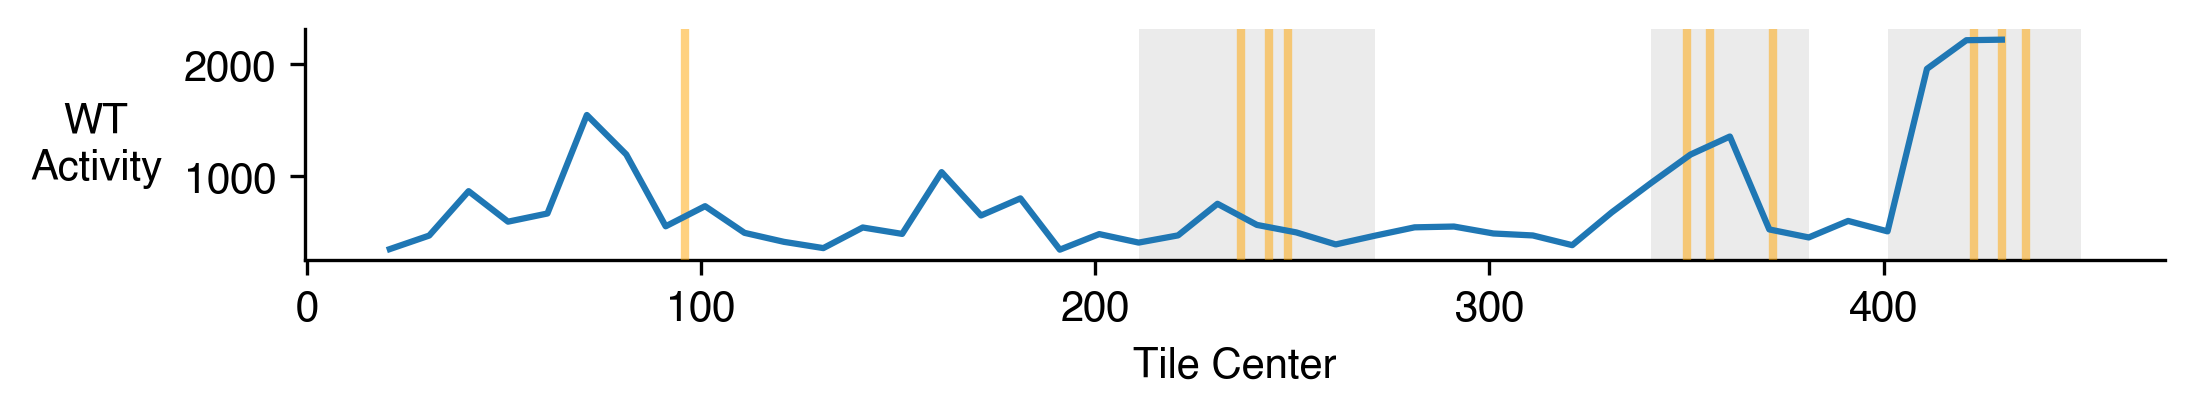

In [309]:
plot_wt_and_ps()
plt.axvspan(211, 271, facecolor='silver', alpha=0.3, label='Region A', zorder = 0)
plt.axvspan(341, 381, facecolor='silver', alpha=0.3, label='Region A', zorder = 0)
plt.axvspan(401, 450, facecolor='silver', alpha=0.3, label='Region A', zorder = 0)

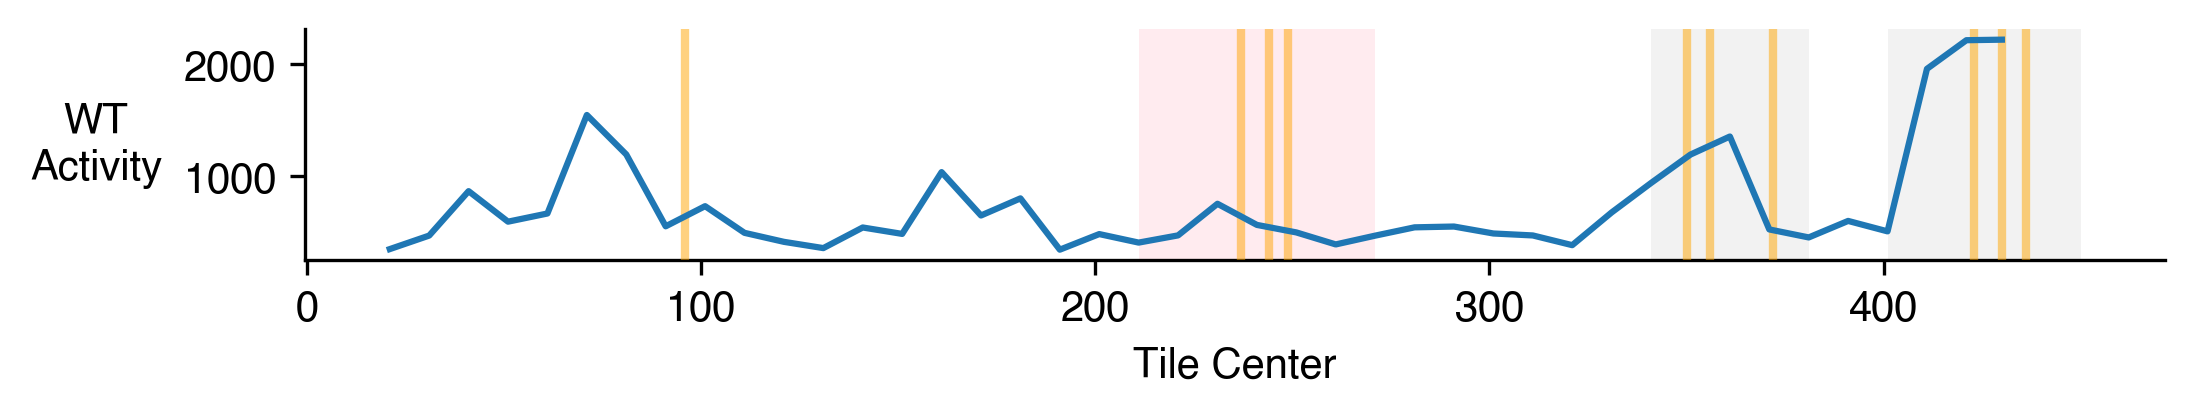

In [297]:
plot_wt_and_ps()
plt.axvspan(211, 271, facecolor='pink', alpha=0.3, label='Region A', zorder = 0)
plt.axvspan(341, 381, facecolor='silver', alpha=0.2, label='Region A', zorder = 0)
plt.axvspan(401, 450, facecolor='silver', alpha=0.2, label='Region A', zorder = 0)

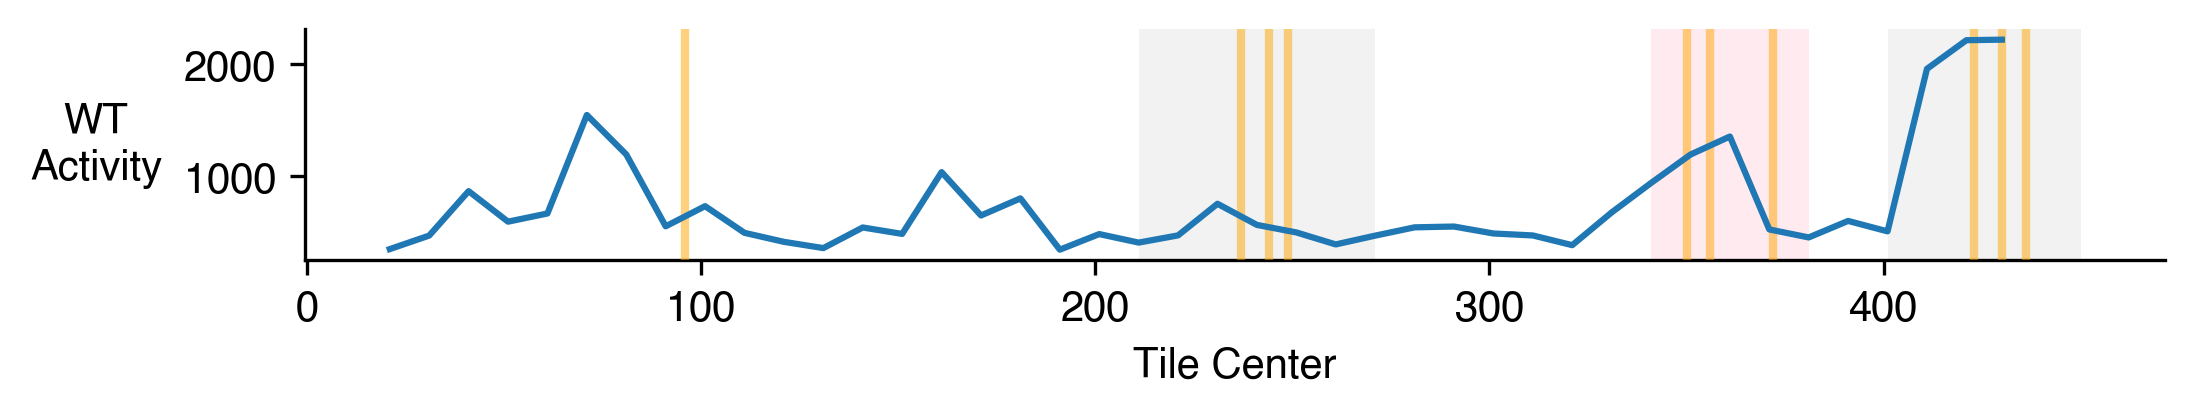

In [298]:
plot_wt_and_ps()
plt.axvspan(211, 271, facecolor='silver', alpha=0.2, label='Region A', zorder = 0)
plt.axvspan(341, 381, facecolor='pink', alpha=0.3, label='Region A', zorder = 0)
plt.axvspan(401, 450, facecolor='silver', alpha=0.2, label='Region A', zorder = 0)

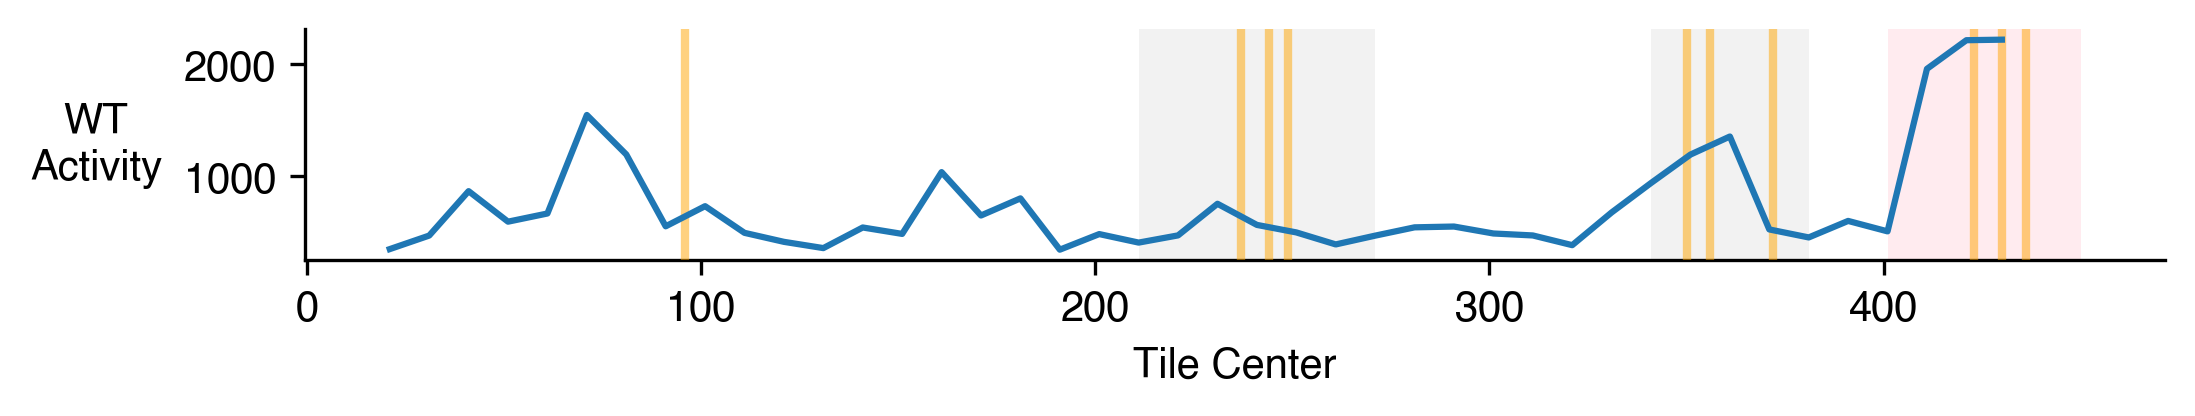

In [301]:
plot_wt_and_ps()
plt.axvspan(211, 271, facecolor='silver', alpha=0.2, label='Region A', zorder = 0)
plt.axvspan(341, 381, facecolor='silver', alpha=0.2, label='Region A', zorder = 0)
plt.axvspan(401, 450, facecolor='pink', alpha=0.3, label='Region A', zorder = 0)

# 1. How do mutants & mimetics of all confirmed phosphosites affect activity?

In [248]:
BasicArTh.head(3)

,Description,Other,Start,mid,End,tile,Activity_S3_1,Activity_S3_2,lib2_avg
0,BasicArTh.1,Q6NQK2,1,21,41,MAGRSWLIDSNRIATKIMSASASSDPRQVVWKSNPSRHCP,349.798825,573.084946,461.441886
1,BasicArTh.2,Q6NQK2,11,31,51,NRIATKIMSASASSDPRQVVWKSNPSRHCPKCQHVIDNSD,470.700956,2417.845241,1444.273098
2,BasicArTh.3,Q6NQK2,21,41,61,SASSDPRQVVWKSNPSRHCPKCQHVIDNSDVVDDWPGLPR,867.654700,1328.781736,1098.218218


In [185]:
# Full confirmed phosphomutant tiles
PSv_conf2fA_STYA = sog1_helpers.return_activities("PSv_conf2fA_STYA")
PSv_conf2fA_STYA.head(3)

,Description,Other,Start,mid,End,tile,Activity_S3_1,Activity_S3_2,lib2_avg
0,7_PSv_conf2fA_STYA,NaN,61,81,101,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPAVNQD,938.283433,835.266419,886.774926
1,8_PSv_conf2fA_STYA,NaN,71,91,111,IIWHLLAKSGLSGLSSHPFIDEFIPAVNQDDGICYTHPKN,NaN,1959.887427,1959.887427
2,9_PSv_conf2fA_STYA,NaN,81,101,121,LSGLSSHPFIDEFIPAVNQDDGICYTHPKNLPGVKSDGTV,1858.333362,1904.584471,1881.458916


In [186]:
# Full confirmed phosphomimetic tiles
PSv_conf2fD = sog1_helpers.return_activities("PSv_conf2fD")
PSv_conf2fD = PSv_conf2fD[~PSv_conf2fD["Description"].str.contains("DD")]
PSv_conf2fD.head(3)

,Description,Other,Start,mid,End,tile,Activity_S3_1,Activity_S3_2,lib2_avg
0,7_PSv_conf2fD,/,61,81,101,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPDVNQD,842.685171,679.024328,760.854750
1,8_PSv_conf2fD,/,71,91,111,IIWHLLAKSGLSGLSSHPFIDEFIPDVNQDDGICYTHPKN,NaN,NaN,NaN
2,9_PSv_conf2fD,/,81,101,121,LSGLSSHPFIDEFIPDVNQDDGICYTHPKNLPGVKSDGTV,3467.363375,3673.033764,3570.198569


In [187]:
# Comparison to WT
PSv_conf2fA_STYA_vs_basic = sog1_helpers.add_all_var_positions(PSv_conf2fA_STYA, BasicArTh, activity_col)
PSv_conf2fD_vs_basic = sog1_helpers.add_all_var_positions(PSv_conf2fD, BasicArTh, activity_col)

In [188]:
phosphomut_positions = PSv_conf2fA_STYA_vs_basic.explode("vars")[["vars", activity_col + "_var"]].reset_index(drop = True)
phosphomim_positions = PSv_conf2fD_vs_basic.explode("vars")[["vars", activity_col + "_var"]].reset_index(drop = True)

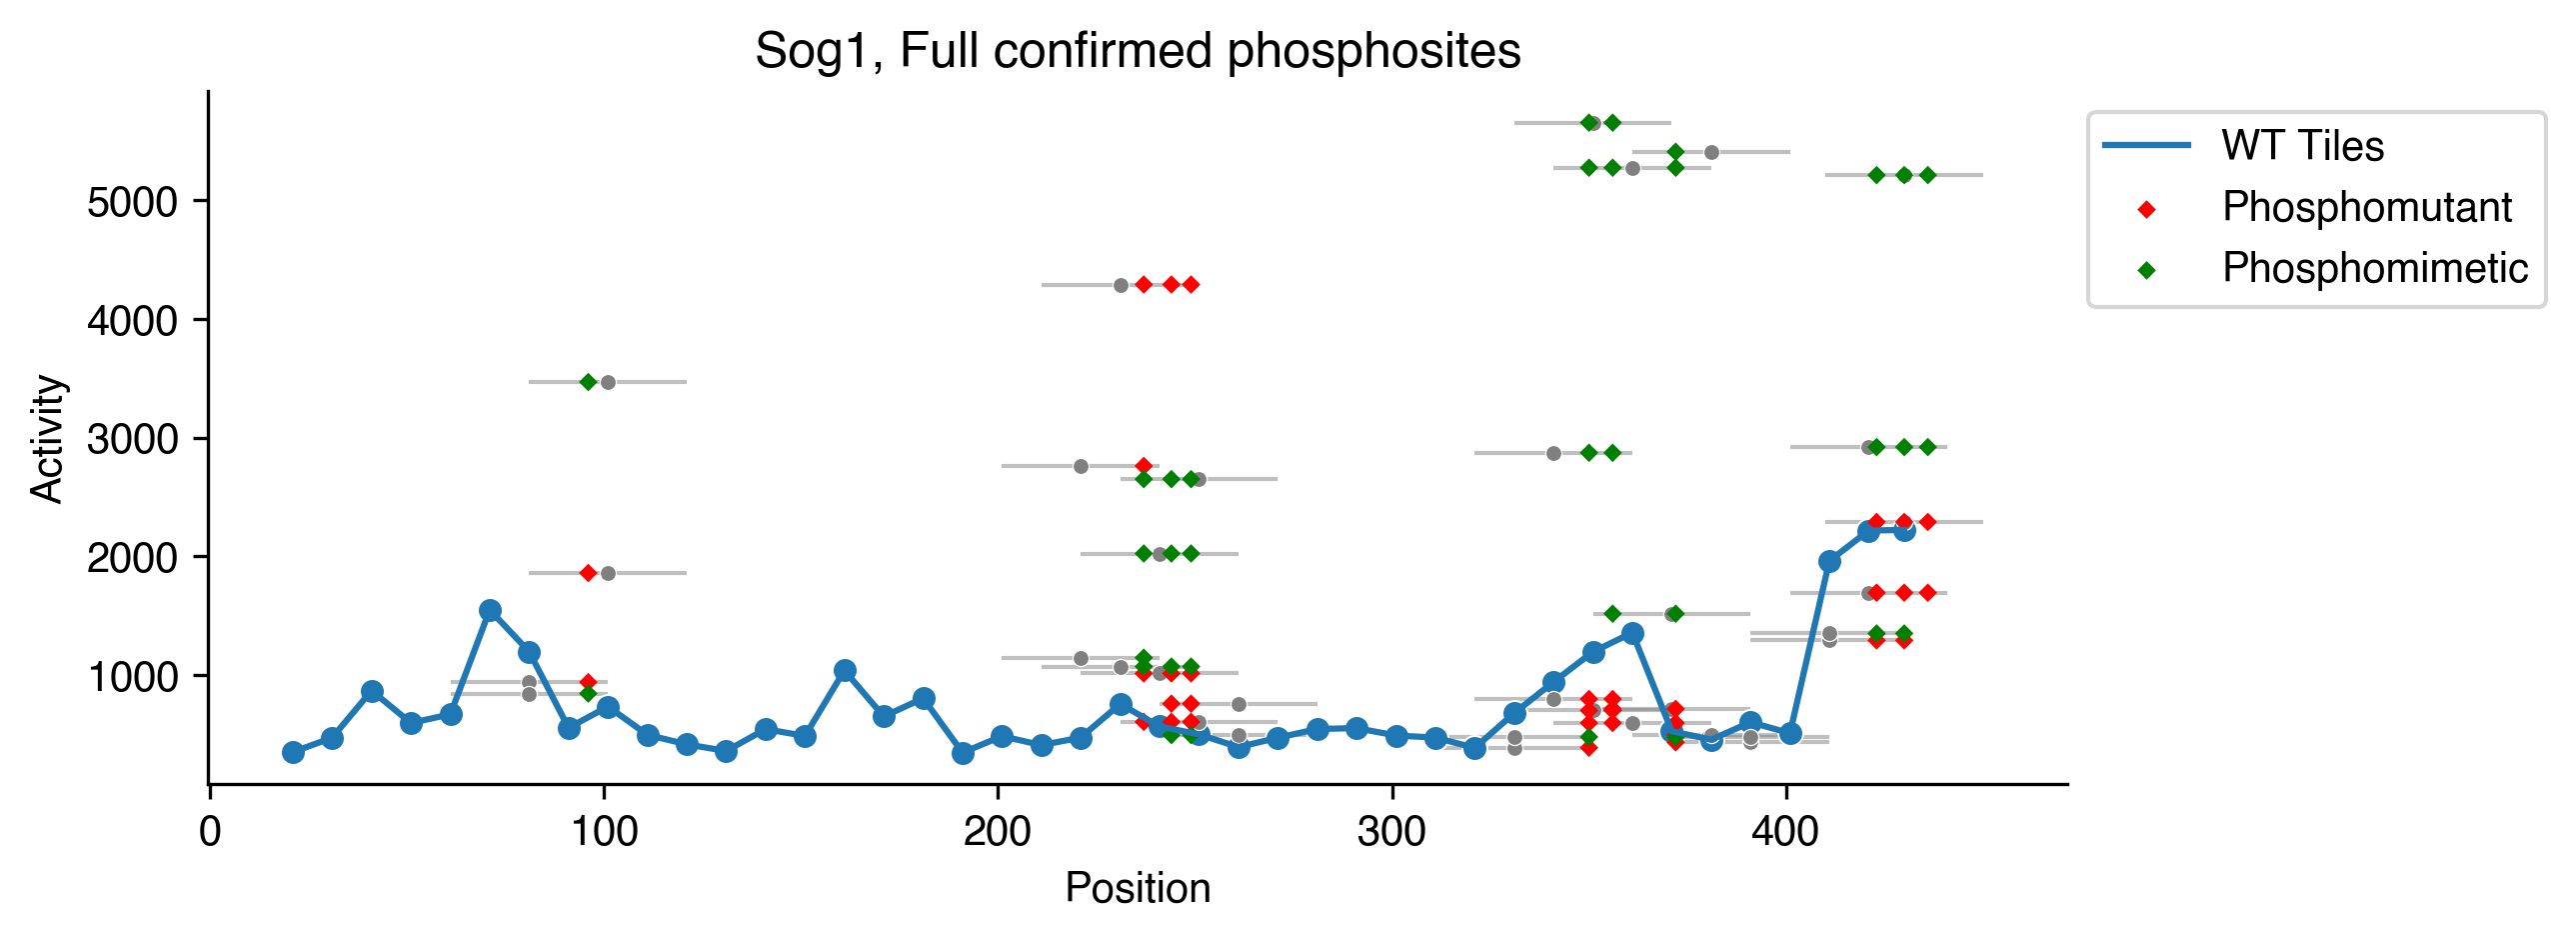

In [189]:
plt.figure(figsize = (8, 3), dpi = 300)
ax = sns.lineplot(data = BasicArTh, x = "mid", y = activity_col, label = "WT Tiles")
sns.scatterplot(data = BasicArTh, x = "mid", y = activity_col)

#sns.lineplot(data = PSv_conf2fA_STYA, x = "mid", y = activity_col, label = "Phosphomutant", color = "red")

#sns.lineplot(data = PSv_conf2fD, x = "mid", y = activity_col, label = "Phosphomimetic", color = "green")

sog1_helpers.plot_all_tiles(PSv_conf2fA_STYA, activity_col, ax=ax, color='gray', center = True)
sns.scatterplot(data = phosphomut_positions, x = "vars", y = activity_col + "_var", 
                ax = ax, color = "red", marker = "D", edgecolor = "none", s = 10, label = "Phosphomutant")

sog1_helpers.plot_all_tiles(PSv_conf2fD, activity_col, ax=ax, color='gray', center = True)
sns.scatterplot(data = phosphomim_positions, x = "vars", y = activity_col + "_var", 
                ax = ax, color = "green", marker = "D", edgecolor = "none", s = 10, label = "Phosphomimetic")

plt.title("Sog1, Full confirmed phosphosites")
plt.ylabel("Activity")
plt.xlabel("Position")
plt.legend(bbox_to_anchor = (1,1))
sns.despine()

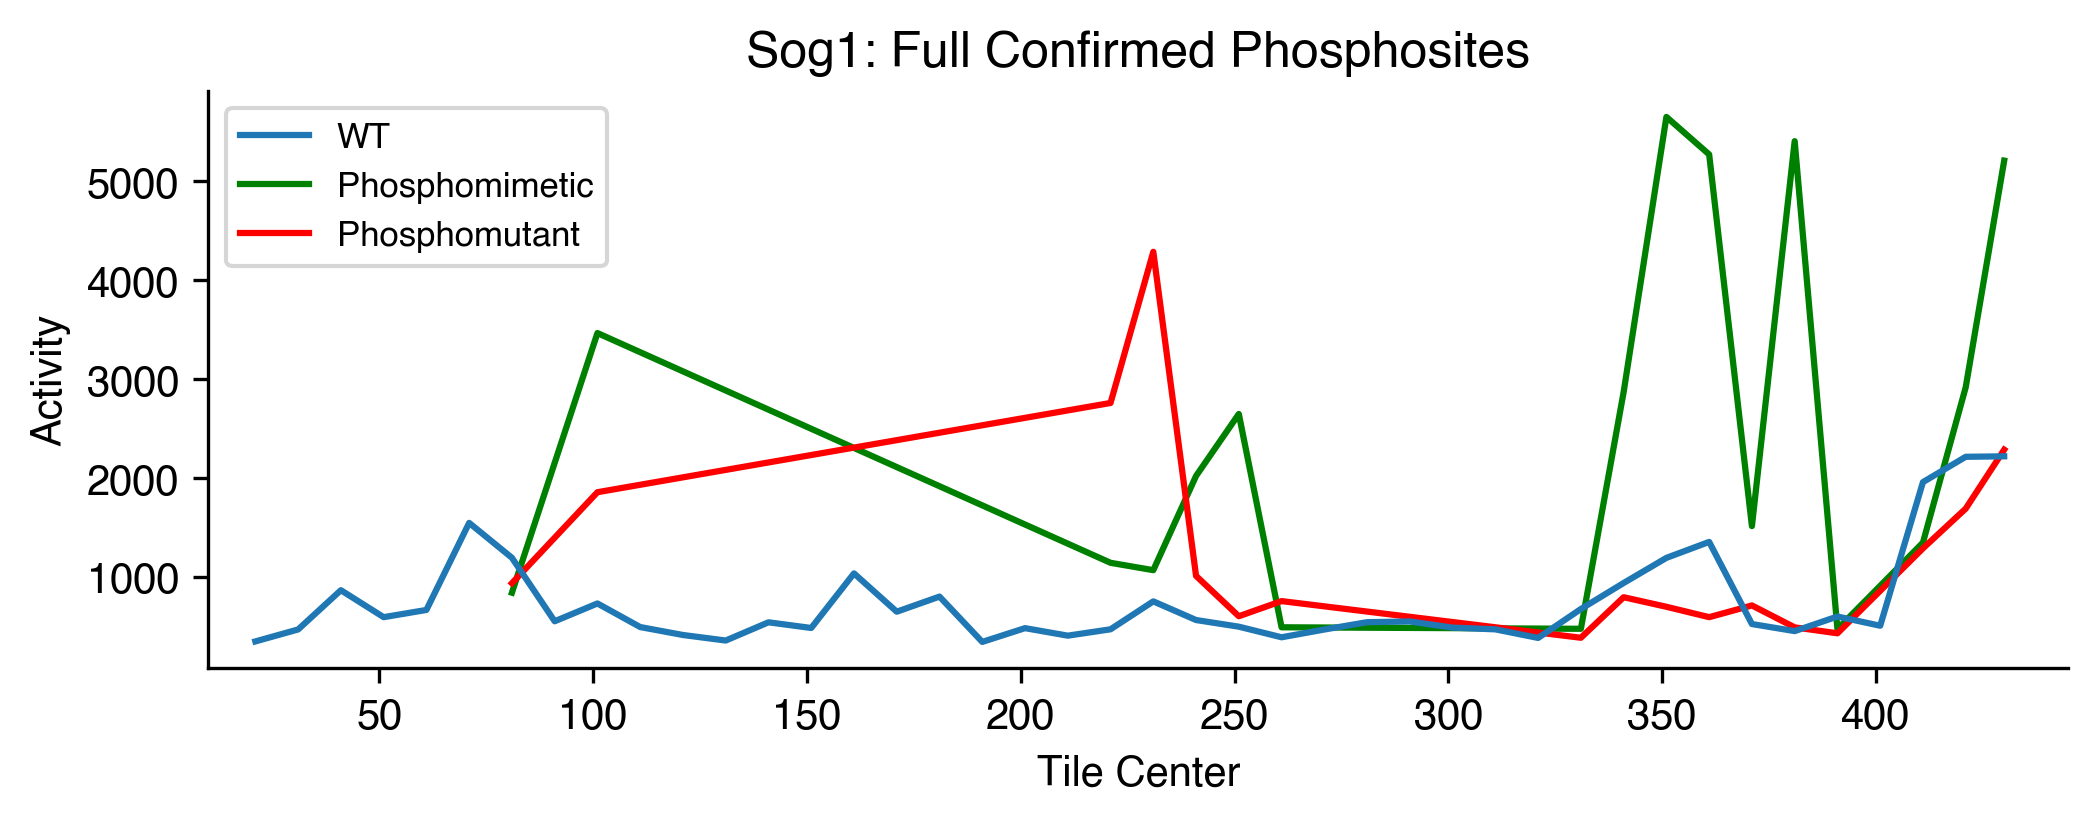

In [486]:
plt.figure(figsize = (8, 2.5), dpi = 300)
#plt.grid(zorder = 0)

# for i in np.arange(21, 440, 10):
#     plt.axvline(i, color = "gray", alpha = 0.1)

ax = sns.lineplot(data = BasicArTh, x = "mid", y = activity_col, zorder = 5, label = "WT")
#sns.scatterplot(data = BasicArTh, x = "mid", y = activity_col, label = "WT", zorder = 5, edgecolor = "none")

#sns.lineplot(data = PSv_conf2fA_STYA, x = "mid", y = activity_col, label = "Phosphomutant", color = "red")

#sns.lineplot(data = PSv_conf2fD, x = "mid", y = activity_col, label = "Phosphomimetic", color = "green")

# sog1_helpers.plot_all_tiles(PSv_conf2fA_STYA, activity_col, ax=ax, color='gray', center = True)
# sns.scatterplot(data = phosphomut_positions, x = "vars", y = activity_col + "_var", 
#                 ax = ax, color = "red", marker = "D", edgecolor = "none", s = 10, label = "Phosphomutant")

# sog1_helpers.plot_all_tiles(PSv_conf2fD, activity_col, ax=ax, color='gray', center = True)
# sns.scatterplot(data = phosphomim_positions, x = "vars", y = activity_col + "_var", 
#                 ax = ax, color = "green", marker = "D", edgecolor = "none", s = 10, label = "Phosphomimetic")

sns.lineplot(data = PSv_conf2fD, x = "mid", y = activity_col, label = "Phosphomimetic", color = "green")
sns.lineplot(data = PSv_conf2fA_STYA, x = "mid", y = activity_col, label = "Phosphomutant", color = "red")

plt.xlim(10, 445)

plt.title("Sog1: Full Confirmed Phosphosites")
plt.ylabel("Activity")
plt.xlabel("Tile Center")
plt.legend(loc = "upper left", fontsize = "small")
sns.despine()

# 2. What is the order of importance of phosphosites?

## 2A. For each single confirmed phosphosite, how does WT vs STY-->A vs STY-->D activity compare?

In [318]:
PSv_conf2sA_STYA = sog1_helpers.return_activities('PSv_conf2sA_STYA')
PSv_conf2sA_STYA

,Description,Other,Start,mid,End,tile,Activity_S3_1,Activity_S3_2,lib2_avg
0,7_PSv_conf2sA_STYA,NaN,61,81,101,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPAVNQD,938.283433,835.266419,886.774926
1,8_PSv_conf2sA_STYA,NaN,71,91,111,IIWHLLAKSGLSGLSSHPFIDEFIPAVNQDDGICYTHPKN,NaN,1959.887427,1959.887427
2,9_PSv_conf2sA_STYA,NaN,81,101,121,LSGLSSHPFIDEFIPAVNQDDGICYTHPKNLPGVKSDGTV,1858.333362,1904.584471,1881.458916
3,10_PSv_conf2sA_STYA,NaN,91,111,131,DEFIPAVNQDDGICYTHPKNLPGVKSDGTVSHFFHKAIKA,NaN,558.417688,558.417688
4,21_PSv_conf2sA_STYA,NaN,201,221,241,GDYVVSKIFYQQPQQLVVKRGDKAEQEVSEDIFAAVAPTA,2760.512552,2926.642543,2843.577547
5,22_PSv_conf2sA_STYA,NaN,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVAPTADPVTPKLATP,NaN,NaN,NaN
6,22_PSv_conf2sA_STYA,NaN,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVAPKLATP,463.613666,1663.967954,1063.790810
7,22_PSv_conf2sA_STYA,NaN,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLAAP,923.329508,NaN,923.329508
8,23_PSv_conf2sA_STYA,NaN,221,241,261,GDKAEQEVSEDIFAAVAPTADPVTPKLATPEPRNAVRICS,NaN,NaN,NaN
9,23_PSv_conf2sA_STYA,NaN,221,241,261,GDKAEQEVSEDIFAAVTPTADPVAPKLATPEPRNAVRICS,496.086024,514.989166,505.537595


In [323]:
PSv_conf2sA_STYA_vs_basic = sog1_helpers.add_var_positions(PSv_conf2sA_STYA, BasicArTh, activity_col)
PSv_conf2sA_STYA_vs_basic

,Description_var,Other_var,Start,mid,End,tile_var,Activity_S3_1_var,Activity_S3_2_var,lib2_avg_var,Description_wt,Other_wt,tile_wt,Activity_S3_1_wt,Activity_S3_2_wt,lib2_avg_wt,var,activ_diff,activ_fold_change
0,7_PSv_conf2sA_STYA,NaN,61,81,101,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPAVNQD,938.283433,835.266419,886.774926,BasicArTh.7,Q6NQK2,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPTVNQD,1195.592810,1693.562924,1444.577867,96,-257.309377,0.784785
1,8_PSv_conf2sA_STYA,NaN,71,91,111,IIWHLLAKSGLSGLSSHPFIDEFIPAVNQDDGICYTHPKN,NaN,1959.887427,1959.887427,BasicArTh.8,Q6NQK2,IIWHLLAKSGLSGLSSHPFIDEFIPTVNQDDGICYTHPKN,553.464718,495.706275,524.585497,96,NaN,NaN
2,9_PSv_conf2sA_STYA,NaN,81,101,121,LSGLSSHPFIDEFIPAVNQDDGICYTHPKNLPGVKSDGTV,1858.333362,1904.584471,1881.458916,BasicArTh.9,Q6NQK2,LSGLSSHPFIDEFIPTVNQDDGICYTHPKNLPGVKSDGTV,733.541576,756.101744,744.821660,96,1124.791786,2.533372
3,10_PSv_conf2sA_STYA,NaN,91,111,131,DEFIPAVNQDDGICYTHPKNLPGVKSDGTVSHFFHKAIKA,NaN,558.417688,558.417688,BasicArTh.10,Q6NQK2,DEFIPTVNQDDGICYTHPKNLPGVKSDGTVSHFFHKAIKA,495.092751,785.676325,640.384538,96,NaN,NaN
4,21_PSv_conf2sA_STYA,NaN,201,221,241,GDYVVSKIFYQQPQQLVVKRGDKAEQEVSEDIFAAVAPTA,2760.512552,2926.642543,2843.577547,BasicArTh.21,Q6NQK2,GDYVVSKIFYQQPQQLVVKRGDKAEQEVSEDIFAAVTPTA,472.388999,419.267250,445.828124,237,2288.123554,5.843727
5,22_PSv_conf2sA_STYA,NaN,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVAPTADPVTPKLATP,NaN,NaN,NaN,BasicArTh.22,Q6NQK2,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATP,754.776581,850.860928,802.818754,237,NaN,NaN
6,22_PSv_conf2sA_STYA,NaN,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVAPKLATP,463.613666,1663.967954,1063.790810,BasicArTh.22,Q6NQK2,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATP,754.776581,850.860928,802.818754,244,-291.162915,0.614240
7,22_PSv_conf2sA_STYA,NaN,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLAAP,923.329508,NaN,923.329508,BasicArTh.22,Q6NQK2,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATP,754.776581,850.860928,802.818754,249,168.552927,1.223315
8,23_PSv_conf2sA_STYA,NaN,221,241,261,GDKAEQEVSEDIFAAVAPTADPVTPKLATPEPRNAVRICS,NaN,NaN,NaN,BasicArTh.23,Q6NQK2,GDKAEQEVSEDIFAAVTPTADPVTPKLATPEPRNAVRICS,566.063618,959.486272,762.774945,237,NaN,NaN
9,23_PSv_conf2sA_STYA,NaN,221,241,261,GDKAEQEVSEDIFAAVTPTADPVAPKLATPEPRNAVRICS,496.086024,514.989166,505.537595,BasicArTh.23,Q6NQK2,GDKAEQEVSEDIFAAVTPTADPVTPKLATPEPRNAVRICS,566.063618,959.486272,762.774945,244,-69.977594,0.876379


In [320]:
PSv_conf2sD = sog1_helpers.return_activities("PSv_conf2sD")
PSv_conf2sD = PSv_conf2sD[~PSv_conf2sD["Description"].str.contains("DD")]
PSv_conf2sD.head(3)

,Description,Other,Start,mid,End,tile,Activity_S3_1,Activity_S3_2,lib2_avg
0,7_PSv_conf2sD,/,61,81,101,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPDVNQD,842.685171,679.024328,760.854750
1,8_PSv_conf2sD,/,71,91,111,IIWHLLAKSGLSGLSSHPFIDEFIPDVNQDDGICYTHPKN,NaN,NaN,NaN
2,9_PSv_conf2sD,/,81,101,121,LSGLSSHPFIDEFIPDVNQDDGICYTHPKNLPGVKSDGTV,3467.363375,3673.033764,3570.198569


In [322]:
PSv_conf2sD_vs_basic = sog1_helpers.add_var_positions(PSv_conf2sD, BasicArTh, activity_col)
PSv_conf2sD_vs_basic

,Description_var,Other_var,Start,mid,End,tile_var,Activity_S3_1_var,Activity_S3_2_var,lib2_avg_var,Description_wt,Other_wt,tile_wt,Activity_S3_1_wt,Activity_S3_2_wt,lib2_avg_wt,var,activ_diff,activ_fold_change
0,7_PSv_conf2sD,/,61,81,101,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPDVNQD,842.685171,679.024328,760.854750,BasicArTh.7,Q6NQK2,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPTVNQD,1195.592810,1693.562924,1444.577867,96,-352.907639,0.704826
1,8_PSv_conf2sD,/,71,91,111,IIWHLLAKSGLSGLSSHPFIDEFIPDVNQDDGICYTHPKN,NaN,NaN,NaN,BasicArTh.8,Q6NQK2,IIWHLLAKSGLSGLSSHPFIDEFIPTVNQDDGICYTHPKN,553.464718,495.706275,524.585497,96,NaN,NaN
2,9_PSv_conf2sD,/,81,101,121,LSGLSSHPFIDEFIPDVNQDDGICYTHPKNLPGVKSDGTV,3467.363375,3673.033764,3570.198569,BasicArTh.9,Q6NQK2,LSGLSSHPFIDEFIPTVNQDDGICYTHPKNLPGVKSDGTV,733.541576,756.101744,744.821660,96,2733.821799,4.726881
3,10_PSv_conf2sD,/,91,111,131,DEFIPDVNQDDGICYTHPKNLPGVKSDGTVSHFFHKAIKA,NaN,NaN,NaN,BasicArTh.10,Q6NQK2,DEFIPTVNQDDGICYTHPKNLPGVKSDGTVSHFFHKAIKA,495.092751,785.676325,640.384538,96,NaN,NaN
4,21_PSv_conf2sD,/,201,221,241,GDYVVSKIFYQQPQQLVVKRGDKAEQEVSEDIFAAVDPTA,1144.654164,680.506059,912.580111,BasicArTh.21,Q6NQK2,GDYVVSKIFYQQPQQLVVKRGDKAEQEVSEDIFAAVTPTA,472.388999,419.267250,445.828124,237,672.265165,2.423118
5,22_PSv_conf2sD,/,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVDPTADPVTPKLATP,2981.931722,1742.787170,2362.359446,BasicArTh.22,Q6NQK2,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATP,754.776581,850.860928,802.818754,237,2227.155141,3.950748
6,22_PSv_conf2sD,/,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVDPKLATP,532.572503,4512.286502,2522.429503,BasicArTh.22,Q6NQK2,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATP,754.776581,850.860928,802.818754,244,-222.204077,0.705603
7,22_PSv_conf2sD,/,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLADP,621.352034,361.544249,491.448141,BasicArTh.22,Q6NQK2,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATP,754.776581,850.860928,802.818754,249,-133.424547,0.823226
8,23_PSv_conf2sD,/,221,241,261,GDKAEQEVSEDIFAAVDPTADPVTPKLATPEPRNAVRICS,3785.062177,3936.399636,3860.730906,BasicArTh.23,Q6NQK2,GDKAEQEVSEDIFAAVTPTADPVTPKLATPEPRNAVRICS,566.063618,959.486272,762.774945,237,3218.998559,6.686637
9,23_PSv_conf2sD,/,221,241,261,GDKAEQEVSEDIFAAVTPTADPVDPKLATPEPRNAVRICS,1111.646275,2469.754565,1790.700420,BasicArTh.23,Q6NQK2,GDKAEQEVSEDIFAAVTPTADPVTPKLATPEPRNAVRICS,566.063618,959.486272,762.774945,244,545.582657,1.963819


In [327]:
conf_s_A_D = pd.merge(PSv_conf2sA_STYA_vs_basic, PSv_conf2sD_vs_basic, on = ["Start", "mid", "End", "var"], suffixes = ("_A", "_D"))
conf_s_A_D

,Description_var_A,Other_var_A,Start,mid,End,tile_var_A,Activity_S3_1_var_A,Activity_S3_2_var_A,lib2_avg_var_A,Description_wt_A,...,Activity_S3_2_var_D,lib2_avg_var_D,Description_wt_D,Other_wt_D,tile_wt_D,Activity_S3_1_wt_D,Activity_S3_2_wt_D,lib2_avg_wt_D,activ_diff_D,activ_fold_change_D
0,7_PSv_conf2sA_STYA,NaN,61,81,101,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPAVNQD,938.283433,835.266419,886.774926,BasicArTh.7,...,679.024328,760.854750,BasicArTh.7,Q6NQK2,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPTVNQD,1195.592810,1693.562924,1444.577867,-352.907639,0.704826
1,8_PSv_conf2sA_STYA,NaN,71,91,111,IIWHLLAKSGLSGLSSHPFIDEFIPAVNQDDGICYTHPKN,NaN,1959.887427,1959.887427,BasicArTh.8,...,NaN,NaN,BasicArTh.8,Q6NQK2,IIWHLLAKSGLSGLSSHPFIDEFIPTVNQDDGICYTHPKN,553.464718,495.706275,524.585497,NaN,NaN
2,9_PSv_conf2sA_STYA,NaN,81,101,121,LSGLSSHPFIDEFIPAVNQDDGICYTHPKNLPGVKSDGTV,1858.333362,1904.584471,1881.458916,BasicArTh.9,...,3673.033764,3570.198569,BasicArTh.9,Q6NQK2,LSGLSSHPFIDEFIPTVNQDDGICYTHPKNLPGVKSDGTV,733.541576,756.101744,744.821660,2733.821799,4.726881
3,10_PSv_conf2sA_STYA,NaN,91,111,131,DEFIPAVNQDDGICYTHPKNLPGVKSDGTVSHFFHKAIKA,NaN,558.417688,558.417688,BasicArTh.10,...,NaN,NaN,BasicArTh.10,Q6NQK2,DEFIPTVNQDDGICYTHPKNLPGVKSDGTVSHFFHKAIKA,495.092751,785.676325,640.384538,NaN,NaN
4,21_PSv_conf2sA_STYA,NaN,201,221,241,GDYVVSKIFYQQPQQLVVKRGDKAEQEVSEDIFAAVAPTA,2760.512552,2926.642543,2843.577547,BasicArTh.21,...,680.506059,912.580111,BasicArTh.21,Q6NQK2,GDYVVSKIFYQQPQQLVVKRGDKAEQEVSEDIFAAVTPTA,472.388999,419.267250,445.828124,672.265165,2.423118
5,22_PSv_conf2sA_STYA,NaN,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVAPTADPVTPKLATP,NaN,NaN,NaN,BasicArTh.22,...,1742.787170,2362.359446,BasicArTh.22,Q6NQK2,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATP,754.776581,850.860928,802.818754,2227.155141,3.950748
6,22_PSv_conf2sA_STYA,NaN,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVAPKLATP,463.613666,1663.967954,1063.790810,BasicArTh.22,...,4512.286502,2522.429503,BasicArTh.22,Q6NQK2,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATP,754.776581,850.860928,802.818754,-222.204077,0.705603
7,22_PSv_conf2sA_STYA,NaN,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLAAP,923.329508,NaN,923.329508,BasicArTh.22,...,361.544249,491.448141,BasicArTh.22,Q6NQK2,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATP,754.776581,850.860928,802.818754,-133.424547,0.823226
8,23_PSv_conf2sA_STYA,NaN,221,241,261,GDKAEQEVSEDIFAAVAPTADPVTPKLATPEPRNAVRICS,NaN,NaN,NaN,BasicArTh.23,...,3936.399636,3860.730906,BasicArTh.23,Q6NQK2,GDKAEQEVSEDIFAAVTPTADPVTPKLATPEPRNAVRICS,566.063618,959.486272,762.774945,3218.998559,6.686637
9,23_PSv_conf2sA_STYA,NaN,221,241,261,GDKAEQEVSEDIFAAVTPTADPVAPKLATPEPRNAVRICS,496.086024,514.989166,505.537595,BasicArTh.23,...,2469.754565,1790.700420,BasicArTh.23,Q6NQK2,GDKAEQEVSEDIFAAVTPTADPVTPKLATPEPRNAVRICS,566.063618,959.486272,762.774945,545.582657,1.963819


In [376]:

conf_s_A_D["log_activ_fold_change_D"] = np.log(conf_s_A_D["activ_fold_change_D"])
conf_s_A_D["log_activ_fold_change_A"] = np.log(conf_s_A_D["activ_fold_change_A"])

pos_avgs = conf_s_A_D[["var", "log_activ_fold_change_D", "log_activ_fold_change_A"]].groupby("var").mean()
pos_avgs = pos_avgs.reset_index()
pos_avgs

,var,log_activ_fold_change_D,log_activ_fold_change_A
0,96,0.601731,0.343603
1,237,1.032345,0.868272
2,244,0.121421,-0.064004
3,249,0.407750,0.900917
4,350,-0.137797,-0.236032
5,356,0.883062,-0.420101
6,372,0.510544,-0.051353
7,423,-0.007813,-0.195164
8,430,0.437676,-0.101710
9,436,0.289553,-0.490438


<Figure size 2400x450 with 0 Axes>

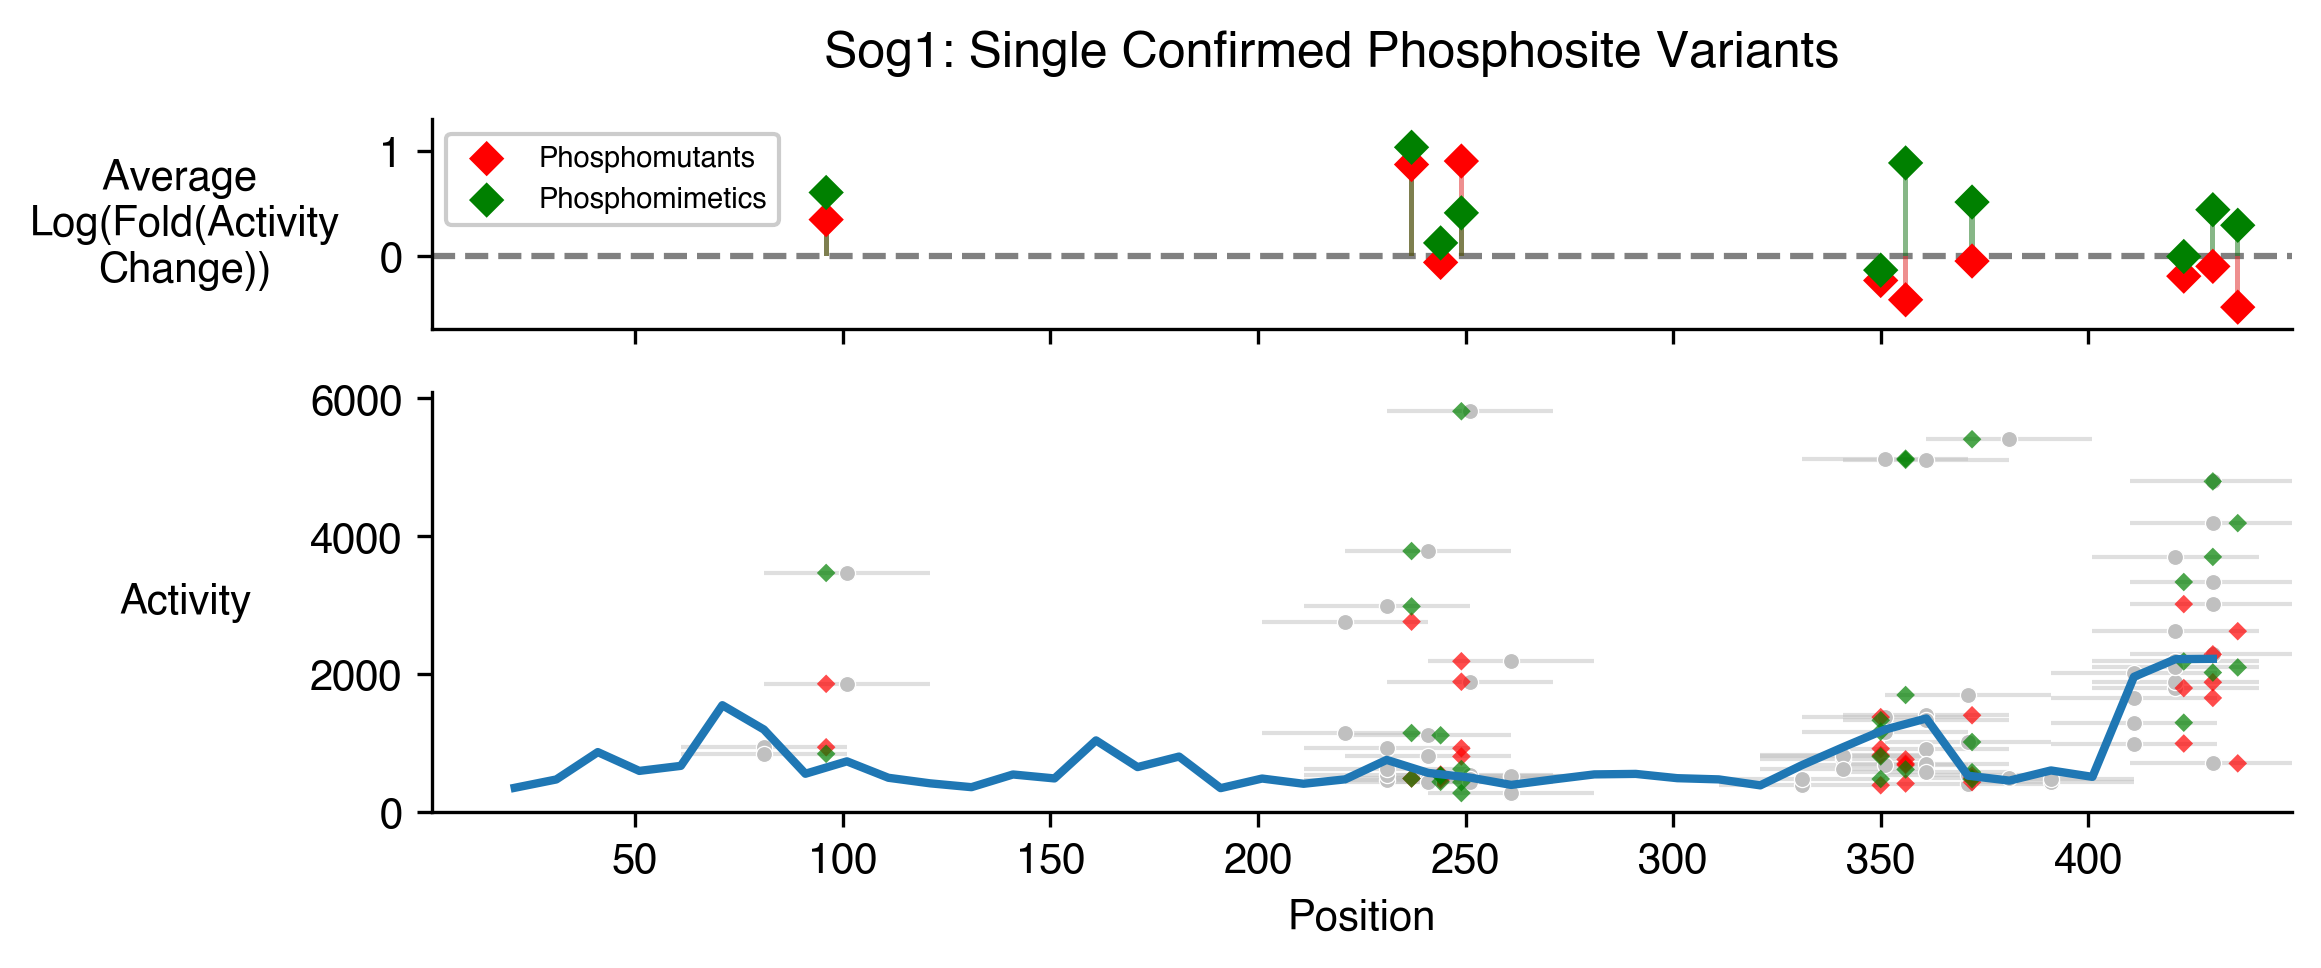

In [483]:
plt.figure(figsize = (8, 1.5), dpi = 300)


fig, axs = plt.subplots(2, 1, figsize=(8, 3), sharex=True, gridspec_kw = {'height_ratios' : [1, 2]}, dpi = 300)

# Plot part 1
ps_locs = sog1_aa_features[sog1_aa_features["PS"]]


# for pos in ps_locs["pos"]:
#     axs[0].axvline(pos, color = "gray", zorder = 0, alpha = 0.2, lw = 2)


# sns.scatterplot(data = conf_s_A_D, x = "var", y = "log_activ_fold_change_A", color = "red", alpha = 0.5, edgecolor = 'none', s = 10)
# sns.scatterplot(data = conf_s_A_D, x = "var", y = "log_activ_fold_change_D", color = "green", alpha = 0.5, edgecolor = 'none', s = 10)

sns.barplot(data=pos_avgs, 
                x="var", 
                y="log_activ_fold_change_A", 
                legend=False, 
                alpha=0.5, 
                edgecolor = "none", 
                native_scale = True, ax = axs[0], color = "red", width = 0.25)



sns.barplot(data=pos_avgs, 
                x="var", 
                y="log_activ_fold_change_D", 
                legend=False, 
                alpha=0.5, 
                edgecolor = "none", 
                native_scale = True, ax = axs[0], color = "green", width = 0.25)

sns.scatterplot(data = pos_avgs, x = "var", y = "log_activ_fold_change_A", color = "red", marker = "D", lw = 1, edgecolor = 'none', ax = axs[0], 
                label = "Phosphomutants")
sns.scatterplot(data = pos_avgs, x = "var", y = "log_activ_fold_change_D", color = "green", marker = "D", lw = 1, edgecolor = 'none', ax = axs[0], 
                label = "Phosphomimetics")

#axs[0].legend(bbox_to_anchor = (1, 1), fontsize = "small")
axs[0].legend(loc = "upper left", fontsize = "x-small", framealpha = 1)

#axs[0].text(x = 0, y = 1, s = "Phosphomutants ($\\rightarrow$A)", color = "red")

# Plot part 2
sog1_helpers.plot_all_tiles(PSv_conf2sA_STYA_vs_basic, activity_col + "_var", ax=axs[1], color='silver')
sns.scatterplot(data=PSv_conf2sA_STYA_vs_basic, 
                x="var", 
                y=activity_col + "_var", 
                color="red", 
                legend=False, 
                alpha=0.7, ax=axs[1], marker = "D", edgecolor = "none", s = 10)

sog1_helpers.plot_all_tiles(PSv_conf2sD_vs_basic, activity_col + "_var", ax=axs[1], color='silver')
sns.scatterplot(data=PSv_conf2sD_vs_basic, 
                x="var", 
                y=activity_col + "_var", 
                color="green", 
                legend=False, 
                alpha=0.7, ax=axs[1], marker = "D", edgecolor = "none", s = 10)

sns.lineplot(data=BasicArTh, x="mid", y=activity_col, label="WT Tiles", lw=2, ax=axs[1], legend = False)


axs[0].axhline(0, color = "gray", zorder = 0, linestyle = "--")
axs[0].set_ylabel("Average \nLog(Fold(Activity\nChange))", rotation = 0, labelpad = 30, va = 'center')
axs[0].set_ylim(-0.7, 1.3)

axs[1].set_xlim(1, 449)
axs[1].set_ylabel("Activity", rotation = 0, labelpad = 30, va = 'center')
axs[1].set_xlabel("Position")

sns.despine()

plt.suptitle("Sog1: Single Confirmed Phosphosite Variants")

fig.align_ylabels(axs)


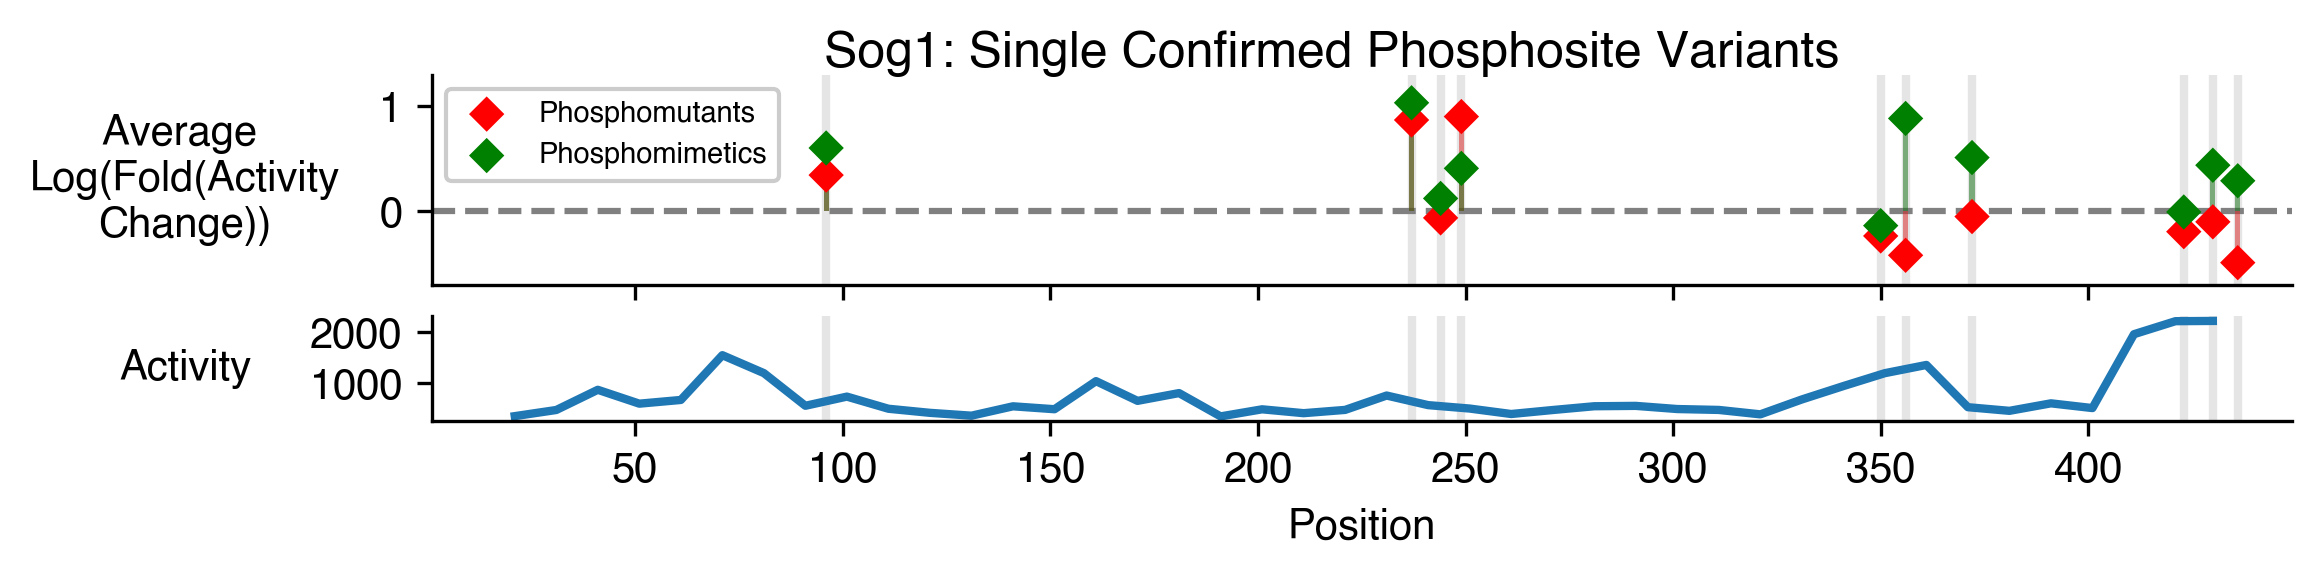

In [504]:
fig, axs = plt.subplots(2, 1, figsize=(8, 1.5), sharex=True, gridspec_kw = {'height_ratios' : [2, 1]}, dpi = 300)

# Plot part 1
ps_locs = sog1_aa_features[sog1_aa_features["PS"]]
for pos in ps_locs["pos"]:
    axs[0].axvline(pos, color = "gray", zorder = 0, alpha = 0.2, lw = 2)



# sns.scatterplot(data = conf_s_A_D, x = "var", y = "log_activ_fold_change_A", color = "red", alpha = 0.5, edgecolor = 'none', s = 10)
# sns.scatterplot(data = conf_s_A_D, x = "var", y = "log_activ_fold_change_D", color = "green", alpha = 0.5, edgecolor = 'none', s = 10)

sns.barplot(data=pos_avgs, 
                x="var", 
                y="log_activ_fold_change_A", 
                legend=False, 
                alpha=0.5, 
                edgecolor = "none", 
                native_scale = True, ax = axs[0], color = "red", width = 0.25)



sns.barplot(data=pos_avgs, 
                x="var", 
                y="log_activ_fold_change_D", 
                legend=False, 
                alpha=0.5, 
                edgecolor = "none", 
                native_scale = True, ax = axs[0], color = "green", width = 0.25)

sns.scatterplot(data = pos_avgs, x = "var", y = "log_activ_fold_change_A", color = "red", marker = "D", lw = 1, edgecolor = 'none', ax = axs[0], 
                label = "Phosphomutants")
sns.scatterplot(data = pos_avgs, x = "var", y = "log_activ_fold_change_D", color = "green", marker = "D", lw = 1, edgecolor = 'none', ax = axs[0], 
                label = "Phosphomimetics")

#axs[0].legend(bbox_to_anchor = (1, 1), fontsize = "small")
axs[0].legend(loc = "upper left", fontsize = "x-small", framealpha = 1)

#axs[0].text(x = 0, y = 1, s = "Phosphomutants ($\\rightarrow$A)", color = "red")

# Plot part 2
for pos in ps_locs["pos"]:
    axs[1].axvline(pos, color = "gray", zorder = 0, alpha = 0.2, lw = 2)

sns.lineplot(data=BasicArTh, x="mid", y=activity_col, label="WT Tiles", lw=2, ax=axs[1], legend = False)


axs[0].axhline(0, color = "gray", zorder = 0, linestyle = "--")
axs[0].set_ylabel("Average \nLog(Fold(Activity\nChange))", rotation = 0, labelpad = 30, va = 'center')
axs[0].set_ylim(-0.7, 1.3)

axs[1].set_xlim(1, 449)
axs[1].set_ylabel("Activity", rotation = 0, labelpad = 30, va = 'center')
axs[1].set_xlabel("Position")

sns.despine()

plt.suptitle("Sog1: Single Confirmed Phosphosite Variants")

fig.align_ylabels(axs)





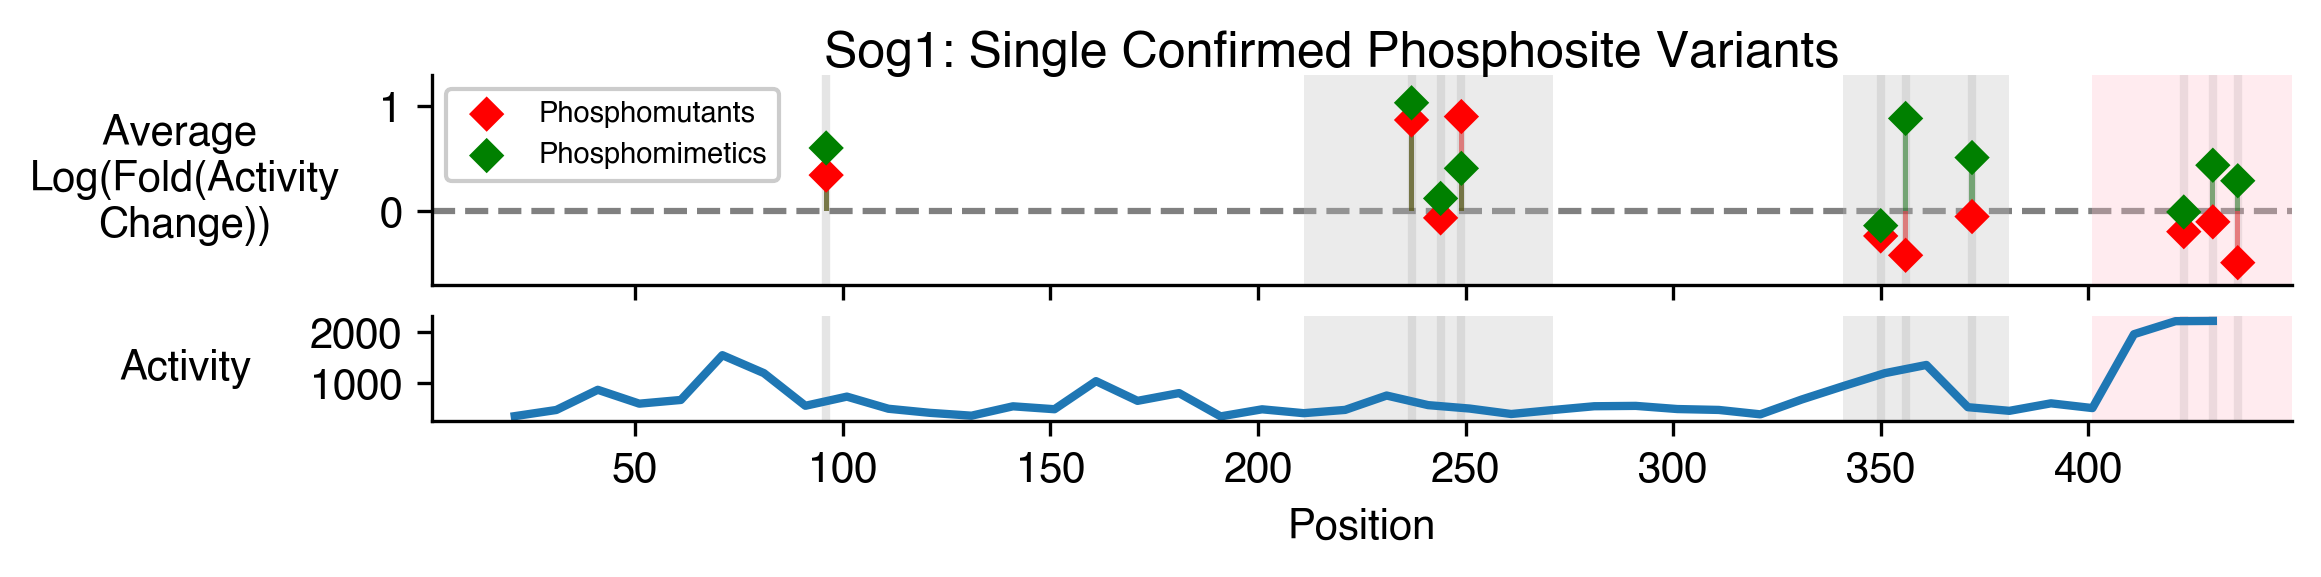

In [511]:
fig, axs = plt.subplots(2, 1, figsize=(8, 1.5), sharex=True, gridspec_kw = {'height_ratios' : [2, 1]}, dpi = 300)

# Plot part 1
ps_locs = sog1_aa_features[sog1_aa_features["PS"]]
for pos in ps_locs["pos"]:
    axs[0].axvline(pos, color = "gray", zorder = 0, alpha = 0.2, lw = 2)



# sns.scatterplot(data = conf_s_A_D, x = "var", y = "log_activ_fold_change_A", color = "red", alpha = 0.5, edgecolor = 'none', s = 10)
# sns.scatterplot(data = conf_s_A_D, x = "var", y = "log_activ_fold_change_D", color = "green", alpha = 0.5, edgecolor = 'none', s = 10)

sns.barplot(data=pos_avgs, 
                x="var", 
                y="log_activ_fold_change_A", 
                legend=False, 
                alpha=0.5, 
                edgecolor = "none", 
                native_scale = True, ax = axs[0], color = "red", width = 0.25)



sns.barplot(data=pos_avgs, 
                x="var", 
                y="log_activ_fold_change_D", 
                legend=False, 
                alpha=0.5, 
                edgecolor = "none", 
                native_scale = True, ax = axs[0], color = "green", width = 0.25)

sns.scatterplot(data = pos_avgs, x = "var", y = "log_activ_fold_change_A", color = "red", marker = "D", lw = 1, edgecolor = 'none', ax = axs[0], 
                label = "Phosphomutants")
sns.scatterplot(data = pos_avgs, x = "var", y = "log_activ_fold_change_D", color = "green", marker = "D", lw = 1, edgecolor = 'none', ax = axs[0], 
                label = "Phosphomimetics")

#axs[0].legend(bbox_to_anchor = (1, 1), fontsize = "small")
axs[0].legend(loc = "upper left", fontsize = "x-small", framealpha = 1)

#axs[0].text(x = 0, y = 1, s = "Phosphomutants ($\\rightarrow$A)", color = "red")

# Plot part 2
for pos in ps_locs["pos"]:
    axs[1].axvline(pos, color = "gray", zorder = 0, alpha = 0.2, lw = 2)

sns.lineplot(data=BasicArTh, x="mid", y=activity_col, label="WT Tiles", lw=2, ax=axs[1], legend = False)


axs[0].axhline(0, color = "gray", zorder = 0, linestyle = "--")
axs[0].set_ylabel("Average \nLog(Fold(Activity\nChange))", rotation = 0, labelpad = 30, va = 'center')
axs[0].set_ylim(-0.7, 1.3)

axs[1].set_xlim(1, 449)
axs[1].set_ylabel("Activity", rotation = 0, labelpad = 30, va = 'center')
axs[1].set_xlabel("Position")

sns.despine()

plt.suptitle("Sog1: Single Confirmed Phosphosite Variants")

fig.align_ylabels(axs)

axs[0].axvspan(211, 271, facecolor='silver', alpha=0.3, label='Region A', zorder = 0)
axs[1].axvspan(211, 271, facecolor='silver', alpha=0.3, label='Region A', zorder = 0)

axs[0].axvspan(341, 381, facecolor='silver', alpha=0.3, label='Region A', zorder = 0)
axs[1].axvspan(341, 381, facecolor='silver', alpha=0.3, label='Region A', zorder = 0)

axs[0].axvspan(401, 450, facecolor='pink', alpha=0.3, label='Region A', zorder = 0)
axs[1].axvspan(401, 450, facecolor='pink', alpha=0.3, label='Region A', zorder = 0)